# Linear Regression 
This notebook contains python code to train and apply a linear regression model. Some of the code is missing and should be completed by you. We indicated all such sections with "Fill the gaps" and with the remark *YOUR CODE* at the exact position of the gap.



***
<br>
## Team
* Kevin Huber
* Markus Kaufmann
* Luca Rava

<br>
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.metrics import r2_score, mean_absolute_error

In this exercise, we use the AutoScout 24 dataset that you already know from the Nearest Neighbor Assignment.

In [2]:
dforig=pd.read_csv('AutoScout24 Dataset.csv')

The attributes "name" and "registration fields" are removed from the dataset, since they are not used for building our model.

In [3]:
df=dforig[dforig.columns.drop(list(dforig.filter(regex='Name|Registration')))]
df


,Price,Mileage,Color,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year
0,44800,27600,anthrazit,2,320,4973,2,8,5,1996
1,22800,18300,anthrazit,4,286,4398,5,8,5,1999
2,183710,650,anthrazit,5,350,4172,5,8,6,2008
3,19900,32000,anthrazit,5,150,2198,7,4,6,2006
4,18999,118000,anthrazit,5,163,2401,5,5,5,2003
5,24900,70000,anthrazit,5,310,4172,5,8,6,2004
6,26800,92500,anthrazit,5,231,2979,5,6,5,2003
7,6900,166000,anthrazit,5,147,2429,7,4,5,2002
8,29900,75000,anthrazit,2,370,3217,4,8,6,2000
9,24800,86200,anthrazit,5,231,2979,5,6,5,2004


Next, we check the correlations between the variables

In [4]:
df.corr()

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year
Price,1.000000,-0.406609,-0.227052,0.711623,0.565910,-0.224519,0.556334,0.465654,0.346073
Mileage,-0.406609,1.000000,0.008850,-0.021234,0.125937,0.064331,0.106386,-0.331536,-0.801396
Doors,-0.227052,0.008850,1.000000,-0.314316,-0.259249,0.633989,-0.276578,0.000698,0.160828
Horsepower,0.711623,-0.021234,-0.314316,1.000000,0.900267,-0.237207,0.853238,0.338058,-0.054777
EngineSize,0.565910,0.125937,-0.259249,0.900267,1.000000,-0.163544,0.916008,0.202249,-0.208695
Seats,-0.224519,0.064331,0.633989,-0.237207,-0.163544,1.000000,-0.208479,-0.007063,0.079213
Cylinders,0.556334,0.106386,-0.276578,0.853238,0.916008,-0.208479,1.000000,0.171990,-0.214286
Gears,0.465654,-0.331536,0.000698,0.338058,0.202249,-0.007063,0.171990,1.000000,0.407441
Year,0.346073,-0.801396,0.160828,-0.054777,-0.208695,0.079213,-0.214286,0.407441,1.000000


We also display the correlation matrix graphically

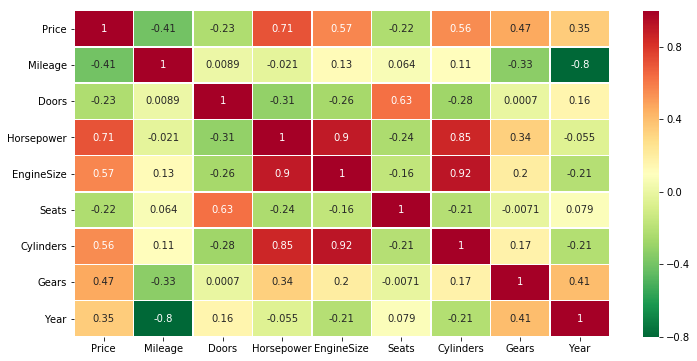

In [5]:
heatmapdata = df.loc[:,['Price', 'Mileage', 'Doors', 'Horsepower', 'EngineSize', 'Seats', 'Cylinders', 'Gears', 'Year']]
plt.subplots(figsize=(12,6))
sns.heatmap(heatmapdata.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.5)
plt.show()

Categorical values should be  one-hot encoded.

In [6]:
df=pd.get_dummies(df)
df

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
0,44800,27600,2,320,4973,2,8,5,1996,1,...,0,0,0,0,0,0,0,0,0,0
1,22800,18300,4,286,4398,5,8,5,1999,1,...,0,0,0,0,0,0,0,0,0,0
2,183710,650,5,350,4172,5,8,6,2008,1,...,0,0,0,0,0,0,0,0,0,0
3,19900,32000,5,150,2198,7,4,6,2006,1,...,0,0,0,0,0,0,0,0,0,0
4,18999,118000,5,163,2401,5,5,5,2003,1,...,0,0,0,0,0,0,0,0,0,0
5,24900,70000,5,310,4172,5,8,6,2004,1,...,0,0,0,0,0,0,0,0,0,0
6,26800,92500,5,231,2979,5,6,5,2003,1,...,0,0,0,0,0,0,0,0,0,0
7,6900,166000,5,147,2429,7,4,5,2002,1,...,0,0,0,0,0,0,0,0,0,0
8,29900,75000,2,370,3217,4,8,6,2000,1,...,0,0,0,0,0,0,0,0,0,0
9,24800,86200,5,231,2979,5,6,5,2004,1,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

We are checking the dataset for duplicate entries



In [7]:
df[df.duplicated(keep=False)]

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
657,16300,10,5,78,1368,5,4,5,2013,1,...,0,0,0,0,0,0,0,0,0,0
658,16300,10,5,78,1368,5,4,5,2013,1,...,0,0,0,0,0,0,0,0,0,0
671,31600,20,5,141,1997,5,4,6,2013,1,...,0,0,0,0,0,0,0,0,0,0
759,15900,50,5,94,1242,5,4,5,2013,1,...,0,0,0,0,0,0,0,0,0,0
760,15900,50,5,94,1242,5,4,5,2013,1,...,0,0,0,0,0,0,0,0,0,0
761,15900,50,5,94,1242,5,4,5,2013,1,...,0,0,0,0,0,0,0,0,0,0
807,31600,20,5,141,1997,5,4,6,2013,1,...,0,0,0,0,0,0,0,0,0,0
817,52950,1,5,241,1998,5,4,8,2013,1,...,0,0,0,0,0,0,0,0,0,0
998,38650,12,5,150,1995,5,4,6,2013,1,...,0,0,0,0,0,0,0,0,0,0
1000,38650,12,5,150,1995,5,4,6,2013,1,...,0,0,0,0,0,0,0,0,0,0


You should see a couple of duplicate entries now. Since duplicate data can spoil your evaluation (even if the repercussions are limited for linear models), we want to remove them. 
<font color="red">Fill the Gap</font>

In [8]:
df = df.drop_duplicates()
df

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
0,44800,27600,2,320,4973,2,8,5,1996,1,...,0,0,0,0,0,0,0,0,0,0
1,22800,18300,4,286,4398,5,8,5,1999,1,...,0,0,0,0,0,0,0,0,0,0
2,183710,650,5,350,4172,5,8,6,2008,1,...,0,0,0,0,0,0,0,0,0,0
3,19900,32000,5,150,2198,7,4,6,2006,1,...,0,0,0,0,0,0,0,0,0,0
4,18999,118000,5,163,2401,5,5,5,2003,1,...,0,0,0,0,0,0,0,0,0,0
5,24900,70000,5,310,4172,5,8,6,2004,1,...,0,0,0,0,0,0,0,0,0,0
6,26800,92500,5,231,2979,5,6,5,2003,1,...,0,0,0,0,0,0,0,0,0,0
7,6900,166000,5,147,2429,7,4,5,2002,1,...,0,0,0,0,0,0,0,0,0,0
8,29900,75000,2,370,3217,4,8,6,2000,1,...,0,0,0,0,0,0,0,0,0,0
9,24800,86200,5,231,2979,5,6,5,2004,1,...,0,0,0,0,0,0,0,0,0,0


Make sure all duplicate entries are removed now

In [9]:
df[df.duplicated(keep=False)]

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss


In [10]:
# We split our dataset into training (80%) and test set (20%)
train, test = train_test_split(df, test_size=0.2)

Outliers are particularly critical for linear models. Therefore, we remove all rows corresponding to outliers of the dependent variable and to outliers of all independent variables, which strongly correlate with the dependent variable. Note that you should determine all outliers on the same dataset, i.e., do not determine outliers for a certain variable on a dataset, where you have already removed rows corresponding to outliers of other variables. 
<font color="red">Fill the Gaps</font>

In [11]:
quartil1 = train["Price"].quantile(.25)
quartil2 = train["Price"].quantile(.75)
# YOUR CODE, remark: you must use the two variables above in your solution. 
    # Note that the outliers should only be displayed at this step. --> REVIEW
df_outliers_price = df[(df.Price < quartil1) | (df.Price > quartil2)]
df_outliers_price

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
0,44800,27600,2,320,4973,2,8,5,1996,1,...,0,0,0,0,0,0,0,0,0,0
2,183710,650,5,350,4172,5,8,6,2008,1,...,0,0,0,0,0,0,0,0,0,0
7,6900,166000,5,147,2429,7,4,5,2002,1,...,0,0,0,0,0,0,0,0,0,0
11,149800,500,2,420,4163,2,8,6,2007,1,...,0,0,0,0,0,0,0,0,0,0
12,64800,11500,4,231,2987,5,6,7,2010,1,...,0,0,0,0,0,0,0,0,0,0
14,10900,180500,5,180,2496,5,6,5,2001,1,...,0,0,0,0,0,0,0,0,0,0
15,9900,67500,5,133,1998,5,4,6,2006,1,...,0,0,0,0,0,0,0,0,0,0
18,159000,14500,2,457,5935,4,12,6,2008,1,...,0,0,0,0,0,0,0,0,0,0
20,247000,29000,2,550,5992,2,12,5,2000,1,...,0,0,0,0,0,0,0,0,0,0
21,9890,162000,4,193,2793,5,6,5,1999,1,...,0,0,0,0,0,0,0,0,0,0


Now we repeat this step with the independent variable that is most strongly correlated with the price.
<font color="red">Fill the gaps</font>

In [12]:
# YOUR CODE --> REVIEW
quartil1 = train["Horsepower"].quantile(.25)
quartil2 = train["Horsepower"].quantile(.75)
df_outliers_power = df[(df.Horsepower < quartil1) | (df.Horsepower > quartil2)]
df_outliers_power

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
0,44800,27600,2,320,4973,2,8,5,1996,1,...,0,0,0,0,0,0,0,0,0,0
1,22800,18300,4,286,4398,5,8,5,1999,1,...,0,0,0,0,0,0,0,0,0,0
2,183710,650,5,350,4172,5,8,6,2008,1,...,0,0,0,0,0,0,0,0,0,0
5,24900,70000,5,310,4172,5,8,6,2004,1,...,0,0,0,0,0,0,0,0,0,0
6,26800,92500,5,231,2979,5,6,5,2003,1,...,0,0,0,0,0,0,0,0,0,0
8,29900,75000,2,370,3217,4,8,6,2000,1,...,0,0,0,0,0,0,0,0,0,0
9,24800,86200,5,231,2979,5,6,5,2004,1,...,0,0,0,0,0,0,0,0,0,0
11,149800,500,2,420,4163,2,8,6,2007,1,...,0,0,0,0,0,0,0,0,0,0
12,64800,11500,4,231,2987,5,6,7,2010,1,...,0,0,0,0,0,0,0,0,0,0
18,159000,14500,2,457,5935,4,12,6,2008,1,...,0,0,0,0,0,0,0,0,0,0


Finally, let us remove the outliers. <font color="red">Fill the gap</font>

In [13]:
#Your Coder --> Review !
df = df.drop(df_outliers_price.index | df_outliers_power.index)
df

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
3,19900,32000,5,150,2198,7,4,6,2006,1,...,0,0,0,0,0,0,0,0,0,0
4,18999,118000,5,163,2401,5,5,5,2003,1,...,0,0,0,0,0,0,0,0,0,0
10,16500,99400,5,144,2435,5,4,6,2004,1,...,0,0,0,0,0,0,0,0,0,0
13,25975,93900,5,185,2400,5,5,6,2006,1,...,0,0,0,0,0,0,0,0,0,0
16,29900,25000,5,170,1998,5,4,6,2010,1,...,0,0,0,0,0,0,0,0,0,0
17,19900,52000,5,131,1397,5,4,6,2010,1,...,0,0,0,0,0,0,0,0,0,0
25,17000,55600,5,170,2435,5,5,5,2006,1,...,0,0,0,0,0,0,0,0,0,0
26,19900,75000,5,150,1984,5,4,6,2005,1,...,0,0,0,0,0,0,0,0,0,0
32,16900,120000,5,147,1998,5,4,7,2005,1,...,0,0,0,0,0,0,0,0,0,0
37,17800,42300,5,133,1798,5,4,5,2007,1,...,0,0,0,0,0,0,0,0,0,0


Note that the outlier detection and elimination process is handled a bit simplified in this notebook. In real world scenarios,
a thorough data analysis is required, which involves testing your model with different outlier thresholds.  

## Model creation
Let us create the linear regression model. 

In [14]:
# Separate dependent and independent variables 

X_train = train.drop('Price', axis=1)
X_test = test.drop('Price', axis=1)

y_train = train.Price
y_test = test.Price


In the next step we create the linear regression model given the dependent and independent variables, which we have separated before. <font color="red">Fill the Gaps</font>

In [15]:
#** YOUR CODE ** (siehe Folie 29) --> Review
#y = y_train.as_matrix()
#X = X_train.as_matrix()
#model = np.dot(X, X.transpose())   NEVER EXECUTE THIS LINE --> NEED A LOT OF RESSOURCES
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Prediction
We then apply the model to our test data and predict car prices.

In [16]:
y_pred=model.predict(X_test)
y_pred

array([13392.20862191, 32115.16139285, 17869.77529587, ...,
       33876.10361445, 26860.38821603, 26464.59982051])

Let us visualize the predictions by means of a scatter plot. A scatter plot displays the predicted and actual values as data points, where the first coordinate of each point is given by the actual value and the second by the predicted value. <font color="red">Fill the Gaps</font>

Text(0,0.5,'Actual values')

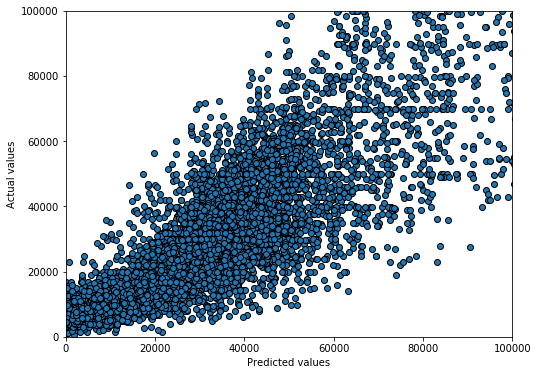

In [17]:
plt.figure(2, figsize=(8, 6))
plt.clf()

     
# set the limit of x and y axis:
plt.xlim(0,100000)
plt.ylim(0,100000)

# Your Code --> for Review
plt.scatter(y_pred,y_test,  cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')


Finally, let us determine the evaluation measures R<sup>2</sup> and Mean Absolute Error (MAE).

In [18]:
R2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print ("R^2: ",R2)
print ("MAE: ",MAE)    

R^2:  0.7040290851526407
MAE:  9582.987671371726


## Unitary Regression

First, we create a distorted price vector by adding random noise.

In [19]:
random_noise=np.random.normal(size=[len(y_train)])

distorted_y_train=y_train+random_noise*5+np.random.normal()*10


Create a linear regression model using the distorted car prices as independent variable and the real car prices as dependent variable. Note that you need to reshape distorted_y_train with numpy.reshape. <font color="red">Fill the Gap</font> 

In [26]:
#Your Code --> for Review
reshaped_data=distorted_y_train.values.reshape(-1, 1)
model=lm.fit(reshaped_data,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We extract both coefficients from the model.

In [36]:
par0=model.intercept_
par1=model.coef_

array([0.99999949])

Finally, determine the confidence intervals for both parameters at the 5% significance level leveraging the formulas given on slide 17 and a table of the student t distribution, which for instance can be obtained from Wikipedia: https://en.wikipedia.org/wiki/Student%27s_t-distribution <font color="red">Fill the Gap</font>

In [43]:
#YOUR CODE --> Review

from scipy.stats import t


print(t.interval(0.95, par0))
print(t.interval(0.95, par1[0]))


(-2.401171242767444, 2.401171242767444)
(-12.706219939572462, 12.706219939572462)
